In [175]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import lasio
import re

In [151]:
#!pip install lasio
#import lasio

In [6]:
#os.chdir(r'G:\_UK Log Library\UK\Quad 21')

In [152]:
# Lists with different log name abbreviations, can be edited as needed
GR_list = ['GR', 'gr', 'GRWS']
DT_list = ['dt', 'dtws', 'DT', 'DTWS']
DTS_list = ['DTS', 'dts', 'DTSWS', 'dtsws']
Res_list = ['DRESWS', 'DRES', 'MRESWS', 'MRES', 'SRESWS', 'SRES']
Rhob_list = ['RHOB', 'RHOBWS', 'RHO', 'RHOWS', 'DEN', 'DENWS']
Npo_list = ['NPOWS', 'NPO']

In [153]:
label_list = GR_list + DT_list + DTS_list + Res_list + Rhob_list + Npo_list + ['Depth'] + ['Wellname']

In [280]:
for root, dirs, files in os.walk(r'/Users/samueleckford/Scripts/Shear Prediction/Data'):
    for file in files:
        if file.endswith(".las"):
            pname = os.path.join(root, file)
            pname = pname.split('/')[:-1]
            pname = '/'.join(pname)
            print(pname)
            try:
                digit = re.search('(\d{2}|\d{1}|[0-20-90-9])(-|_)(\d{2}[a-zA-Z]|\d{2}|\d{1}|\d{1}[a-zA-Z])(_|-|-_|_-)(\d{2}[a-zA-Z]|\d{2}|\d{1}|\d{1}[a-zA-Z])', pname).group(0)
                print(digit)
            except:
                break

/Users/samueleckford/Scripts/Shear Prediction/Data
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-2Z/CDA
21-1-2
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-1/TGS
21-1-1
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-1/TGS
21-1-1
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-2,Z/CDA
21-1-2
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-3/CDA
21-1-3
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-3/CDA
21-1-3
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-3/CDA
21-1-3
/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-3/CDA
21-1-3


In [174]:
las_list = []
shear_master_df = pd.DataFrame()
for root, dirs, files in os.walk(r'/Users/samueleckford/Scripts/Shear Prediction/Data'):
    for file in files:
        if file.endswith(".las"):
            # Open las and add columns for wellname and depth
            try:
                las = lasio.read(os.path.join(root, file), ignore_header_errors=True)
                well_df = las.df()
                try:
                    well_df['Wellname'] = las.well.well.value
                except:
                    pass
                try:
                    path=os.path.dirname(root).split('/')[-1]
            print(path)  
                except:
                    print('error - no well name. Well skipped')
                    break
                well_df['Depth'] = well_df.index

                # Check if and of the well logs from the set list are in the column names, if they are append to las list
                if any(ele in DT_list for ele in well_df.columns):

                    # Create trimmed down df based on the columns we want, found in the 'label_list'
                    temp_df = pd.DataFrame()
                    for col in well_df.columns:
                        for label in label_list:
                            if label == col:
                                temp_df[col] = well_df[col]
                    print(las.well.well.value)
                    # Append temp_df to master sheet that should only contain wells with the desired log (ideally 'DTS' but could be used for different logs)
                    shear_master_df = shear_master_df.append(temp_df)
                    las_list.append(os.path.join(root, file))
            except:
                print('las file could not be read. File skipped')
                break

#shear_master_df['Wellname'].unique()

21-1-2Z
21/01-2Z


Unable to parse line as LAS header: DFPH.                 10:   DRILLING FLUID PH
line 949 (section ~PARAMETER INFORMATION): "DFPH.                 10:   DRILLING FLUID PH"


21-1-1
21/01- 1


Unable to parse line as LAS header: DFPH.                 10:   DRILLING FLUID PH
line 960 (section ~PARAMETER INFORMATION): "DFPH.                 10:   DRILLING FLUID PH"


21-1-1
21/01- 1
21-1-2,Z
21/01-2
21-1-3
21-1-3
21-1-3
21-1-3


In [155]:
shear_master_df.reset_index(inplace=True, drop=True)
shear_master_df

,index,DT,GR,RHOB,Wellname,Depth,DENWS,DRESWS,DTWS,GRWS,NPOWS,SRESWS
0,1398.0,NaN,NaN,NaN,21/01-2Z,1398.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1398.5,NaN,NaN,NaN,21/01-2Z,1398.5,NaN,NaN,NaN,NaN,NaN,NaN
2,1399.0,NaN,NaN,NaN,21/01-2Z,1399.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1399.5,NaN,NaN,NaN,21/01-2Z,1399.5,NaN,NaN,NaN,NaN,NaN,NaN
4,1400.0,NaN,NaN,NaN,21/01-2Z,1400.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
69572,4907.5,NaN,NaN,NaN,21/01-2,4907.5,NaN,NaN,NaN,NaN,NaN,NaN
69573,4908.0,NaN,NaN,NaN,21/01-2,4908.0,NaN,NaN,NaN,NaN,NaN,NaN
69574,4908.5,NaN,NaN,NaN,21/01-2,4908.5,NaN,NaN,NaN,NaN,NaN,NaN
69575,4909.0,NaN,NaN,NaN,21/01-2,4909.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
shear_master_df.to_csv('shear_master_df.csv')

In [25]:
shear_filter = shear_master_df[shear_master_df['DTSWS']>= 0]
shear_filter['Wellname']

155395     21/01A- 19
155396     21/01A- 19
155397     21/01A- 19
155398     21/01A- 19
155399     21/01A- 19
              ...    
4011221      21/24- 6
4011222      21/24- 6
4011223      21/24- 6
4011224      21/24- 6
4011225      21/24- 6
Name: Wellname, Length: 102033, dtype: object

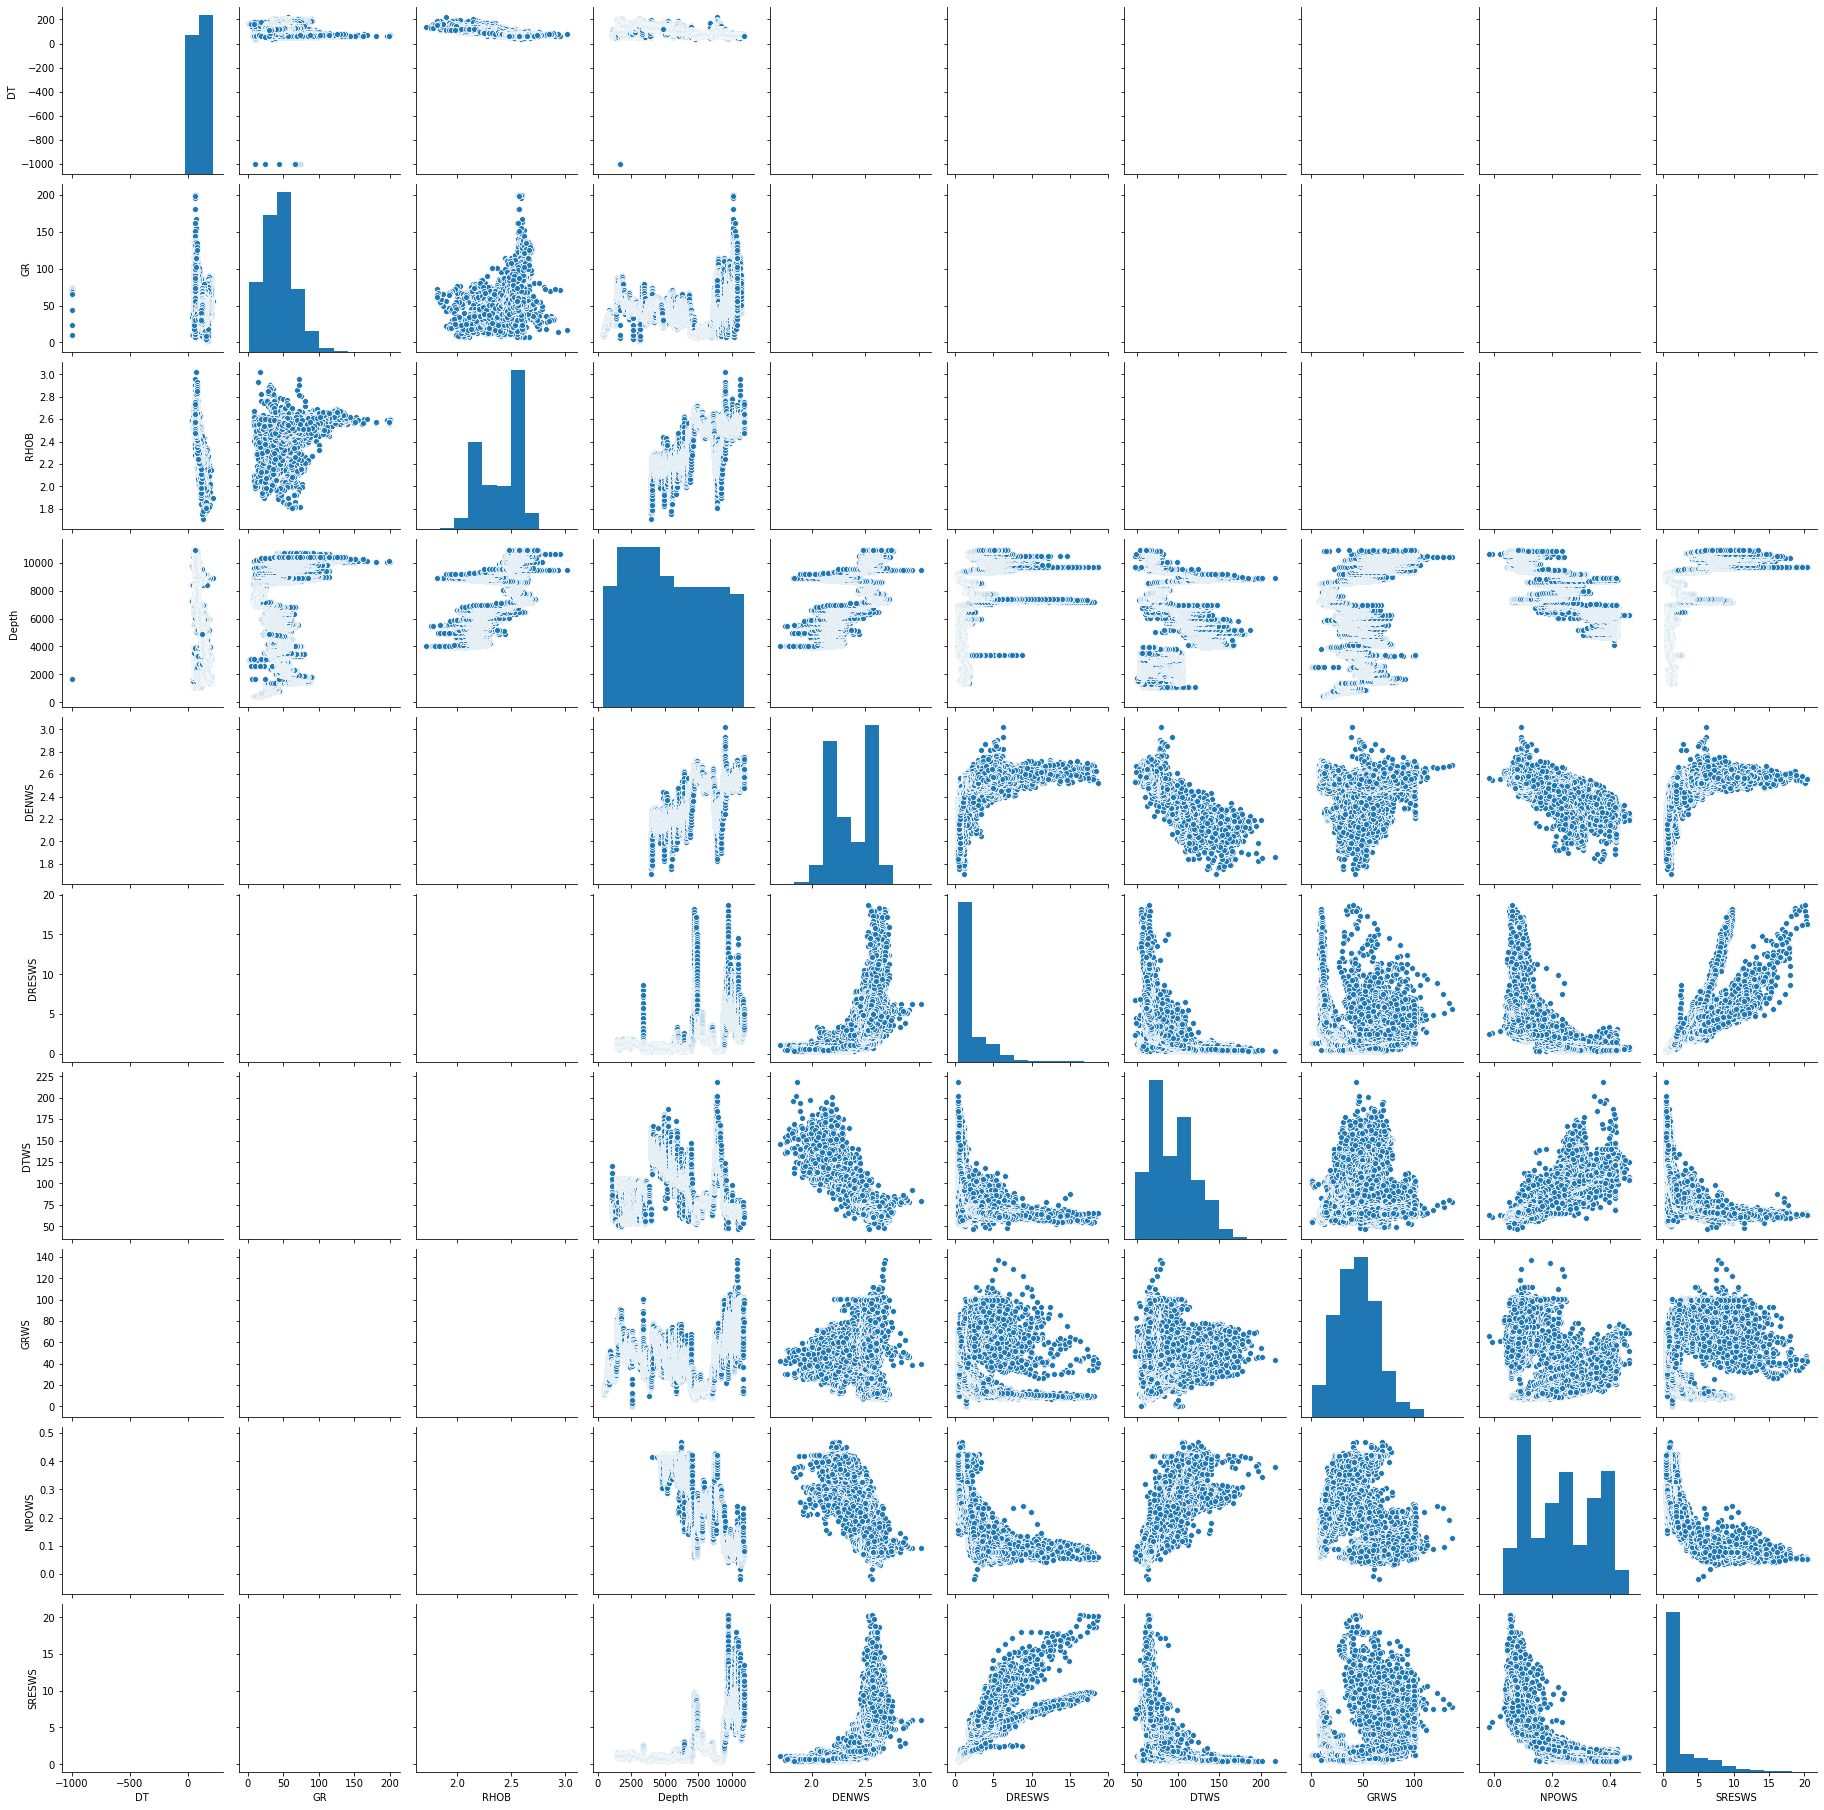

In [106]:
sns.pairplot(shear_master_df)

In [107]:
folder_create = os.path.exists("data")
if folder_create is False:
    os.mkdir("./data")
    os.mkdir("./data/train")
    os.mkdir("./data/test")

In [127]:
# Look at the unique well names and the number of wells to figure out the split on
print(shear_master_df['Wellname'].nunique())
shear_master_df['Wellname'].unique()

3


array(['21/01-2Z', '21/01- 1', '21/01-2'], dtype=object)

In [144]:
# Create a list of well names to test on (around 20-30% of wells)
well_list = ['21/01-2']

In [145]:
shear_test = shear_master_df.loc[shear_master_df.Wellname.isin(well_list)]
shear_train = shear_master_df.loc[~shear_master_df.Wellname.isin(well_list)]

In [48]:
las = lasio.read(r'/Users/samueleckford/Scripts/Shear Prediction/Data/21-1-1/TGS/21_01_1_440_10916_uk24500038490000_1505264_wsr.las', ignore_header_errors=True)
well_df = las.df()
well_df.columns

Unable to parse line as LAS header: DFPH.                 10:   DRILLING FLUID PH
line 960 (section ~PARAMETER INFORMATION): "DFPH.                 10:   DRILLING FLUID PH"


Index(['CALDED', 'CALSED', 'CALWS', 'CONDWS', 'CORRED', 'DCORWS', 'DENWS',
       'DPOWS', 'DRESWS', 'DTED', 'DTWS', 'GRDED', 'GRED', 'GRSED', 'GRWS',
       'ILDED', 'LLDED', 'LLSED', 'MLLED', 'NPHILSED', 'NPOWS', 'RHOBED',
       'SNED', 'SPRED', 'SPWS', 'SRESWS'],
      dtype='object')

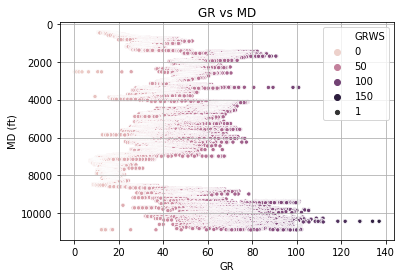

<Figure size 288x72 with 0 Axes>

In [27]:
# Plot the logs
sns.scatterplot(well_df.GRWS, well_df.index, hue=well_df.GRWS, size=1)
ax= plt.gca()
ax.set_xlabel('GR')
ax.set_ylabel('MD (ft)')
plt.figure(figsize=(4, 1))
ax.set_title('GR vs MD')
ax.invert_yaxis()
ax.grid()
plt.show()